<div align="center">
    <img src='https://media-exp1.licdn.com/dms/image/C561BAQFV4oU27rzxaQ/company-background_10000/0/1562869489836?e=2147483647&v=beta&t=OMHL6Izxqw7r8S5fn9gDQM1hNMKgo3yqMlH1F3Iwm9o' style='height:300px;'>
</div>


<center><h1 style='font-size:35px'>Encoding y imputación de variables</h1></center>

---

**Fecha de creación: 25/05/2022**

**Autores**:
* Marilina Trevisan (marilinatrevisan@gmail.com).
* Gustavo Ariel Venchiarutti (gustavo.venchiarutti@gmail.com).
* Ani Salama (anisalama@gmail.com).
* Anahí Sulca (nanisulca@gmail.com).
* Agustín Trulli (agustintrulli@gmail.com).

**Grupo: 6**

En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas Suburb y las columnas obtenidas a partir del conjunto de datos airbnb.

En esta notebook, se utilizará resultado de dichas operaciones. que fue guardado en un archivo (Ejercicio 3 entregable 1).


De la base de datos de Melburn vamos a considerar la siguiente informacion detallando el significad de cada campo

**Suburbio:** Suburbio

**Address:** Dirección

**Rooms:** Número de habitaciones

**Price:** Precio en dólares australianos

**Method:** puede ser 
**S** - propiedad vendida;
**SP** - propiedad vendida anteriormente;
**PI** - propiedad pasada;
**PN** - vendido antes no revelado;
**SN** - vendido no revelado;
**NB** - sin oferta;
**VB** - oferta del proveedor;
**W** - retirado antes de la subasta;
**SA** - vendido después de la subasta;
**SS** - vendido después del precio de subasta no revelado.
**N/A** - precio o oferta más alta no disponible.

**Type:** identifica el tipo de vivienda
**br** - dormitorio(s);
**h** - casa, casa de campo, villa, semi, terraza;
**u** - unidad, dúplex;
**t** - casa adosada;
**sitio de desarrollo** - sitio de desarrollo;
**o res** - otros residenciales.

**SellerG:** Agente Inmobiliario

**Date:** Fecha de venta

**Distance:** Distancia desde el centro en kilómetros

**Postcode;** Codigo postal

**Bedroom2:** Nº raspado de dormitorios (de diferente fuente)

**Bathroom:** Número de baños

**Car:** Número de cocheras

**Landsize:** Tamaño de la tierra en metros

**BuildingArea:** Tamaño construido en metros

**YearBuilt:** Año en que se construyó la casa

**CouncilArea:** Consejo de Gobierno de la zona

**Latitude** y **Longtitude**

**Regionname:** Región general (Oeste, Noroeste, Norte, Noreste ... etc)

**Propertycount:** Número de propiedades que existen en el suburbio.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy
import pandas 
import sklearn
import seaborn
seaborn.set_context('talk')

from operator import index
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [4]:
ROOT_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(ROOT_PATH, 'data', 'preprocessed')

melb_df = pandas.read_csv(os.path.join(DATA_PATH, 'Ventas_join_zipcode.csv'))

## Ejercicio 1: Encoding

**Algunas opciones:**
  **1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. **
  **2. `DictVectorizer` con algunos pasos de pre-proceso previo.**

**Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.**


###Analis Varibles Categoricas

In [5]:
# Para realizar el proceso de ENCODING utilizamos solo variable categoricas
# El metodo consiste en tomara las alternativas de las variables categoricas colocarlas como columnas en el
# data frame y asiganrle un 1 a las filas que cumplen con la consicion y un 0 a las que no tienen 
# asiganada esa alternativa
categorical_cols_1 = ['Type']
categorical_cols_2 = ['Method']
categorical_cols_3 = ['Regionname']

print('Tipos de viviendas para analizar, variable Type', melb_df.Type.unique())
print('Cantidad de Casos diferentes de tipos de Viviendas', melb_df[categorical_cols_1].nunique())
print('Cantidad de registros nulos considerando Tipos de Viviendas', melb_df[categorical_cols_1].isna().sum())

print('\n\nMetodo de Ventas para analizar, variable Method', melb_df.Method.unique())
print('Cantidad de Metodos diferentes de Ventas realizadas', melb_df[categorical_cols_2].nunique())
print('Cantidad de registros nulos considerando Metodos de Ventas', melb_df[categorical_cols_2].isna().sum())

print('\n\nRegiones donde se ubican las casas, Variable Regionname', melb_df.Regionname.unique())
print('Cantidad de Vendedores diferentes ', melb_df[categorical_cols_3].nunique())
print('Cantidad de registros nulos considerando Vendedores', melb_df[categorical_cols_3].isna().sum())


Tipos de viviendas para analizar, variable Type ['h' 'u' 't']
Cantidad de Casos diferentes de tipos de Viviendas Type    3
dtype: int64
Cantidad de registros nulos considerando Tipos de Viviendas Type    0
dtype: int64


Metodo de Ventas para analizar, variable Method ['S' 'SP' 'PI' 'VB' 'SA']
Cantidad de Metodos diferentes de Ventas realizadas Method    5
dtype: int64
Cantidad de registros nulos considerando Metodos de Ventas Method    0
dtype: int64


Regiones donde se ubican las casas, Variable Regionname ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']
Cantidad de Vendedores diferentes  Regionname    8
dtype: int64
Cantidad de registros nulos considerando Vendedores Regionname    0
dtype: int64


Despues de analizarlas vamos a descartar **Method** porque en realidad no tiene un impacto importante al momento de determinara los precios de ventas de las propiedades.

In [6]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Suburb                     13211 non-null  object 
 1   Rooms                      13211 non-null  int64  
 2   Type                       13211 non-null  object 
 3   Price                      13211 non-null  float64
 4   Method                     13211 non-null  object 
 5   SellerG                    13211 non-null  object 
 6   Date                       13211 non-null  object 
 7   Distance                   13211 non-null  float64
 8   Postcode                   13211 non-null  float64
 9   Bedroom2                   13211 non-null  float64
 10  Bathroom                   13211 non-null  float64
 11  Car                        13149 non-null  float64
 12  Landsize                   13211 non-null  float64
 13  BuildingArea               6913 non-null   flo

In [7]:
melb_df.value_counts('Type')

Type
h    9086
u    3016
t    1109
dtype: int64

In [8]:
melb_df.value_counts('Regionname')

Regionname
Southern Metropolitan         4380
Northern Metropolitan         3860
Western Metropolitan          2939
Eastern Metropolitan          1458
South-Eastern Metropolitan     448
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
dtype: int64

### ONEHOTENCODER

#### Seccion 1 --> FIT

Los metodos de trensformacion constan de de dos partes `fit` (entrenar) es el encargado de recopilar toda la información necesaria para aplicar el encoding.

In [9]:
# Asigno el metodo de ONEHOTECODER con sus paramentros a la variable encoder1 para varibale
# categorica Type y encoder2 para variable categorica Regionname
ohe1 = OneHotEncoder(sparse=False, categories="auto", dtype= numpy.int64, drop=None)
ohe2 = OneHotEncoder(sparse=False, categories="auto", dtype= numpy.int64, drop=None)

# A la variable oh_encoder1 y oh_encoder2 le cargo el array que obtengo como resultado del entrenamiento 
# aplicado sobre las columna que seleccione del data frame
ohe1.fit(melb_df[['Type']])
ohe2.fit(melb_df[['Regionname']])

OneHotEncoder(dtype=<class 'numpy.int64'>, sparse=False)

In [10]:
# Alicado el ONEHOTENCODING podemos verificar las "CATEGORIAS" que encontro usando 
# el primer paso del metodo que tambien las puedo usar como nombre de columnas al concatenar con
# el data frame original 
print('Catewgorias considerando la variavle TYPE', ohe1.categories_)
print('\nCategorias considerando la variavle REGIONNAME', ohe2.categories_)
 

Catewgorias considerando la variavle TYPE [array(['h', 't', 'u'], dtype=object)]

Categorias considerando la variavle REGIONNAME [array(['Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'], dtype=object)]


####Seccion 2 --> Transform

La parte `transform` (transformar) es el encargado de generar el arreglo de unos y ceros que corresponden a las columnas asociadas a los distintos valores que toma la variable categorica.

In [11]:
# Una vez encontradas las diferentes categorias que tiene la variable categorica 
# que voy a utilizar genero el arreglo con 1 y 0 de acuerdo a los valores que 
# tienen los rergistros del data frame 

types_ohe = ohe1.transform(melb_df[['Type']])
types_ohe[:10] 

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [12]:
region_ohe = ohe2.transform(melb_df[['Regionname']])
region_ohe[:10] 

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

####Seccion 3 --> Todo en uno

In [13]:
# Proceso reducido de ONEHOTENCODIG para las dos variable seleccionadas
# Sparce=False no me crea la matriz sparsa
# categories="auto" define los nobres de las columnas por default
# dtype= numpy.int64 genero solo datos enteros
# drop=None puedo eliminar alguna columna al momento de armar el array por ejemplo cuando
# la variable categoria es binaria puedo eliminar una de ellas
ohe1 = OneHotEncoder(sparse=False, categories="auto", dtype= numpy.int64, drop=None)
ohe2 = OneHotEncoder(sparse=False, categories="auto", dtype= numpy.int64, drop=None)

In [14]:
type_ohe = ohe1.fit_transform(melb_df[['Type']])
type_ohe[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [15]:
region_ohe = ohe2.fit_transform(melb_df[['Regionname']])
region_ohe[:10]

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

### LABELBINARIZER

#### Seccion 1 --> FIT

Los metodos de trensformacion constan de de dos partes `fit` (entrenar) es el encargado de recopilar toda la información necesaria para aplicar el encoding.

In [16]:
# En este caso uso el metodo de LABELBINARIZER para la variable encoder1 que vamos
# a utilizar para varibale categorica Type y encoder2 para variable categorica Regionname
encoder1 = sklearn.preprocessing.LabelBinarizer()
encoder2 = sklearn.preprocessing.LabelBinarizer()

# A la variable encoder le cargo el array con las categorias que encuentro el 
# la columna que seleccione del data frame
encoder1.fit(melb_df[['Type']])
encoder2.fit(melb_df[['Regionname']])

LabelBinarizer()

In [17]:
# Alicado el LABELBINARIZER podemos verificar las "CLASSES" que encontro usando 
# el primer paso del metodo que tambien las puedo usar como nombre de columnas al concatenar con
# el data frame original 
# Podemos verificar las categorias que encontro usando el metodo de encoder 
print('Clases considerando la variavle TYPE', encoder1.classes_)
print('\nClases considerando la variavle REGIONNAME', encoder2.classes_)

Clases considerando la variavle TYPE ['h' 't' 'u']

Clases considerando la variavle REGIONNAME ['Eastern Metropolitan' 'Eastern Victoria' 'Northern Metropolitan'
 'Northern Victoria' 'South-Eastern Metropolitan' 'Southern Metropolitan'
 'Western Metropolitan' 'Western Victoria']


####Seccion 2 --> Transform

La parte `transform` (transformar) es el encargado de generar el arreglo de unos y ceros que corresponden a las columnas asociadas a los distintos valores que toma la variable categorica.

In [18]:
# Una vez encontradas las diferentes categorias que tiene la variable categorica 
# que voy a utilizar, genero el arreglo con 1 y 0 de acuerdo a los valores que 
# tienen los registros del data frame 
types_encoded = encoder1.transform(melb_df[['Type']])
types_encoded[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [19]:
region_encoded = encoder2.transform(melb_df[['Regionname']])
region_encoded[:10]

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

####Seccion 3 --> Todo en uno

In [20]:
# Proceso reducido de LABELBINARIZER para las dos variable seleccionadas
label_binarizer = sklearn.preprocessing.LabelBinarizer()

In [21]:
type_lavelbin = label_binarizer.fit_transform(melb_df[['Type']])
type_lavelbin[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [22]:
region_lavelbin = label_binarizer.fit_transform(melb_df[['Regionname']])
region_lavelbin[:10]

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

### Concatenar al DF original

Al momento de realizar el proceso de ENCODING se podria realizar con cualquiera de los metodos mencionados. En particular estos metodos generarn solamente un **array**. Ahora en este paso tenemos que convertir esos arreglos en data frame y concatenerlos con el **data frame original**

Vamos a utilizar los arreglos que se generaron con el LABELBINARIZER

In [23]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Suburb                     13211 non-null  object 
 1   Rooms                      13211 non-null  int64  
 2   Type                       13211 non-null  object 
 3   Price                      13211 non-null  float64
 4   Method                     13211 non-null  object 
 5   SellerG                    13211 non-null  object 
 6   Date                       13211 non-null  object 
 7   Distance                   13211 non-null  float64
 8   Postcode                   13211 non-null  float64
 9   Bedroom2                   13211 non-null  float64
 10  Bathroom                   13211 non-null  float64
 11  Car                        13149 non-null  float64
 12  Landsize                   13211 non-null  float64
 13  BuildingArea               6913 non-null   flo

In [24]:
# Para que pueda correr varias veces el proceso sin errores realizo la verificacion de los datos en la
# data frame para saber si ya cargue los datos del arreglo
if 'Type_h' in melb_df:
    # Reordemo las clomunas del data frame para ver como se cargaron los 1 y los 0 de acuerdo al
    # metodo de ONEHOTENCODER
    reodenar = ['Suburb',	'Rooms',	'Price', 'Method',	'SellerG',	'Date',	'Distance',	'Postcode', 'zipcode',
              'Bedroom2',	'Bathroom',	'Car',	'Landsize',	'BuildingArea',	'YearBuilt', 'Lattitude', 'Longtitude',
              'airbnb_record_count', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean',
              'Type', 'Type_h', 'Type_t', 'Type_u', 'Regionname', 'Eastern Metropolitan', 'Eastern Victoria', 
              'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 
              'Western Metropolitan', 'Western Victoria']
    melb_df = melb_df[reodenar]

    melb_df.info()    
else:
    # Con esta funcion de pandas puedo trasnformar el arreglo que genero el TRANSFORM
    # en un data frame que despues puedo concatener al original melb_df
    melb_df_encoded1 = pandas.DataFrame(types_encoded)
    melb_df_encoded2 = pandas.DataFrame(region_encoded)

    # Se renombran las columnas con las categorias detectadas por LabelBinarizer
    # en el primer paso FIT considerando el campo Type
    nombre_cols1 = ["Type_" + i for i in encoder1.classes_]
    melb_df_encoded1.columns = nombre_cols1

    # Se renombran las columnas con las categorias detectadas por LabelBinarizer
    # en el primer paso FIT considerando el campo Regionname. En este caso las 
    # categorias tienen nombres identificativos
    nombre_cols2 = [i for i in encoder2.classes_]
    melb_df_encoded2.columns = nombre_cols2

    # Realizo en concatenar de los dos data frame, el generdo con el encoder melb_df_encoded
    # el data frme original melb_df.
    melb_df = pandas.concat([melb_df, melb_df_encoded1], axis=1)
    melb_df = pandas.concat([melb_df, melb_df_encoded2], axis=1)

    # Puedo concatenar los dos data frame y eliminar la columna Type y dejar las nuevas columnas
    #melb_df = pandas.concat([melb_df, melb_df_encoded], axis=1).drop(['Type'], axis=1)

    # Reordemo las clomunas del data frame para ver como se cargaron los 1 y los 0 de acuerdo al
    # metodo de ONEHOTENCODER
    reodenar = ['Suburb',	'Rooms',	'Price', 'Method',	'SellerG',	'Date',	'Distance',	'Postcode', 'zipcode',
              'Bedroom2',	'Bathroom',	'Car',	'Landsize',	'BuildingArea',	'YearBuilt', 'Lattitude', 'Longtitude',
              'airbnb_record_count', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean',
              'Type', 'Type_h', 'Type_t', 'Type_u', 'Regionname', 'Eastern Metropolitan', 'Eastern Victoria', 
              'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 
              'Western Metropolitan', 'Western Victoria']
    melb_df = melb_df[reodenar]

In [25]:
melb_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Suburb                      13211 non-null  object 
 1   Rooms                       13211 non-null  int64  
 2   Price                       13211 non-null  float64
 3   Method                      13211 non-null  object 
 4   SellerG                     13211 non-null  object 
 5   Date                        13211 non-null  object 
 6   Distance                    13211 non-null  float64
 7   Postcode                    13211 non-null  float64
 8   zipcode                     13187 non-null  float64
 9   Bedroom2                    13211 non-null  float64
 10  Bathroom                    13211 non-null  float64
 11  Car                         13149 non-null  float64
 12  Landsize                    13211 non-null  float64
 13  BuildingArea                691

In [26]:
# Muestro todas las columnas resultado del data frame nuevo donde aplique el metodo de ONEHOTENCODER
# para la variable categorica Method. Con el siguiente seto veo todas las columnas
pandas.set_option('display.max_columns', None)

melb_df

,Suburb,Rooms,Price,Method,SellerG,Date,Distance,Postcode,zipcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Type,Type_h,Type_t,Type_u,Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,Abbotsford,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,258.0,130.624,605.152,2187.032,h,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0
1,Abbotsford,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,258.0,130.624,605.152,2187.032,h,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0
2,Abbotsford,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,258.0,130.624,605.152,2187.032,h,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0
3,Abbotsford,3,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,258.0,130.624,605.152,2187.032,h,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0
4,Abbotsford,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,258.0,130.624,605.152,2187.032,h,1,0,0,Northern Metropolitan,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,Wheelers Hill,4,1245000.0,S,Barry,26/08/2017,16.7,3150.0,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,189.0,124.026,526.350,1901.611,h,1,0,0,South-Eastern Metropolitan,0,0,0,0,1,0,0,0
13207,Williamstown,3,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,74.0,191.095,612.250,2119.750,h,1,0,0,Western Metropolitan,0,0,0,0,0,0,1,0
13208,Williamstown,3,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,74.0,191.095,612.250,2119.750,h,1,0,0,Western Metropolitan,0,0,0,0,0,0,1,0
13209,Williamstown,4,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,74.0,191.095,612.250,2119.750,h,1,0,0,Western Metropolitan,0,0,0,0,0,0,1,0


## Ejercicio 2: Imputación por IterativeImputer y KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [28]:
# Calculamos el valor del percenti 95%
melb_df["BuildingArea"].quantile(0.95)

274.0

In [29]:
# Elemino dos registros de la base de datos original que afectan fuertemente en el
# analisis grafico
melb_df = melb_df[melb_df.YearBuilt != 1196]
melb_df = melb_df[(melb_df.BuildingArea <= 275)|(melb_df.BuildingArea.isnull())]

melb_df[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       5203
BuildingArea    6298
dtype: int64

In [30]:
# Realizamos copia del data frame original para mantener los datos y comparar los procesos
melb_df_imputer = melb_df.copy(deep=True)
melb_df_knn = melb_df.copy(deep=True)

melb_df[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       5203
BuildingArea    6298
dtype: int64


**La diferencia importante con los metodos anteriores es que esta imputacion de valores se hace directamente sobre un data frame que pasamos como parametro**

###ITERACTIVEIMPUTER

#### Seccion 1--> Calculo todo en uno

Aplico el metodo considerando la alternativa de la **Seccion 3 --> TODO EN UNO**


In [31]:
# Asigno el metodo INTERACTIVEIMPUTER con sus paramentros a la variable imputer para varibale
# numericas consideradas 'YearBuilt','BuildingArea'. En este caso se procesan las dos juntas
# Utilizamos el KNN como parametro para estimar con este metodo
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=5))

In [32]:
# Aplico el metodo INTERACTIVEIMPUTER al data frame melb_df_imputer copia del original
melb_df_imputer[['YearBuilt','BuildingArea']] = imputer.fit_transform(melb_df_imputer[['YearBuilt', 'BuildingArea']])

melb_df_imputer[['YearBuilt','BuildingArea']].isnull().sum()

/Users/agustintrulli/miniconda3/envs/diplodatos_ayvd/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


YearBuilt       0
BuildingArea    0
dtype: int64

####Seccion 2 --> Analisis grafico

In [33]:
# Creamos un df para registrar los datos para la variable YearBuilt que estan 
# en el data frame 
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

# Creamos un df para registrar los datos que se impoutaron con el metedo 
# INTERACTIVEIMPUTER para la variable YearBuilt
imputer_year_built = melb_df_imputer.YearBuilt.to_frame()
imputer_year_built['Imputation'] = 'Imputacion en YearBuilt'

data_year_built = pandas.concat([imputer_year_built, melb_year_build], ignore_index=True)

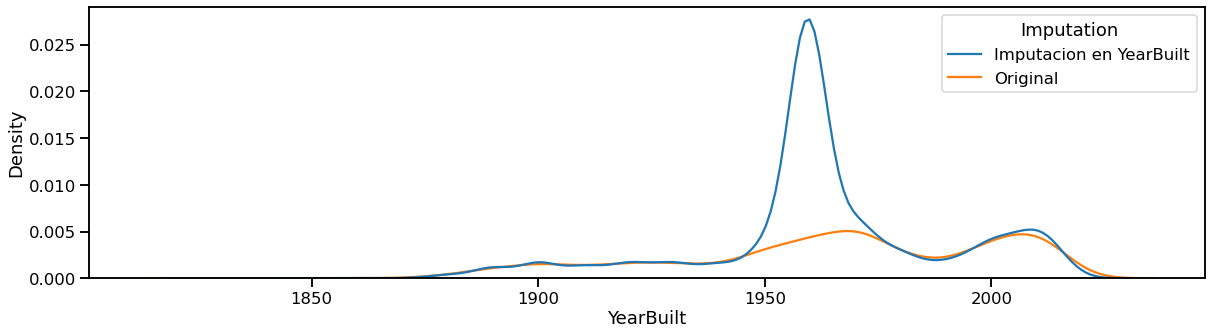

In [34]:
# Construyo el grafico comparando los dos dataframe que se crearon para representar 
# el YearBuilt original y el calculado con INTERACTIVEIMPUTER

fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data_year_built, x='YearBuilt', hue='Imputation')

In [35]:
# Creamos un df para registrar los datos para la variable BuildingArea que estan 
# en el data frame 
melb_build_area = melb_df.BuildingArea.dropna().to_frame()
melb_build_area['Imputation'] = 'Original'

# Creamos un df para registrar los datos que se impoutaron con el metedo 
# INTERACTIVEIMPUTER para la variable BuildingArea
imputer_build_area = melb_df_imputer.BuildingArea.to_frame()
imputer_build_area['Imputation'] = 'Imputacion en BuildingArea'


data_build_area = pandas.concat([imputer_build_area, melb_build_area], ignore_index=True)

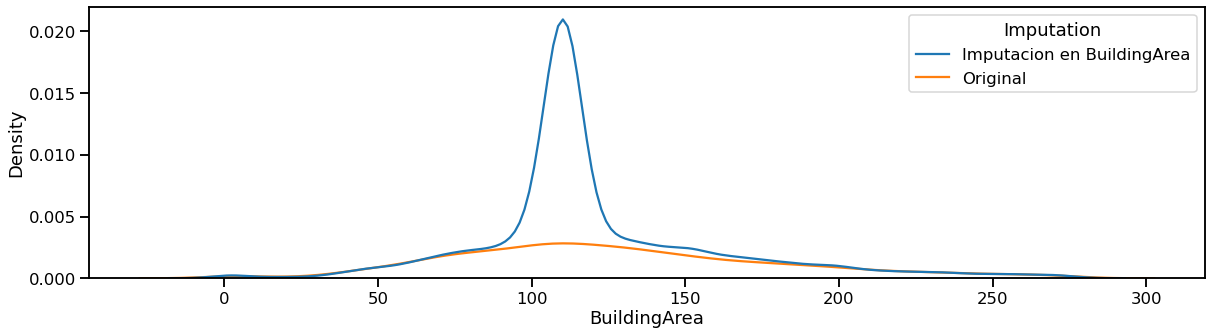

In [36]:
# Construyo el grafico comparando los dos dataframe que se crearon para representar 
# el YearBuilt original y el calculado con INTERACTIVEIMPUTER
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data_build_area, x='BuildingArea', hue='Imputation')

###Metodo KNN visto en Clases

#### Seccion 1--> Calculo todo en uno

Aplico el metodo considerando la alternativa de la **Seccion 3 --> TODO EN UNO**

In [37]:
# Asigno el metodo KNN con sus paramentros a la variable knn_imputer para varibale
# numericas consideradas 'YearBuilt','BuildingArea'. En este caso se procesan las dos juntas
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")


In [38]:
# Aplico el metodo KNN al data frame melb_df_knn copia del original
melb_df_knn[['YearBuilt','BuildingArea']] = knn_imputer.fit_transform(melb_df_knn[['YearBuilt','BuildingArea']])

melb_df_imputer[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

####Seccion 2 --> Analisis grafico

In [39]:
# Creamos un df para registrar los datos para la variable YearBuilt que estan 
# en el data frame 
knn_year_built = melb_df_knn.YearBuilt.to_frame()
knn_year_built['Imputation'] = 'KNN over YearBuilt'

# Creamos un df para registrar los datos que se impoutaron con el metedo 
# KNN para la variable YearBuilt
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data_year_build = pandas.concat([knn_year_built, melb_year_build], ignore_index=True)

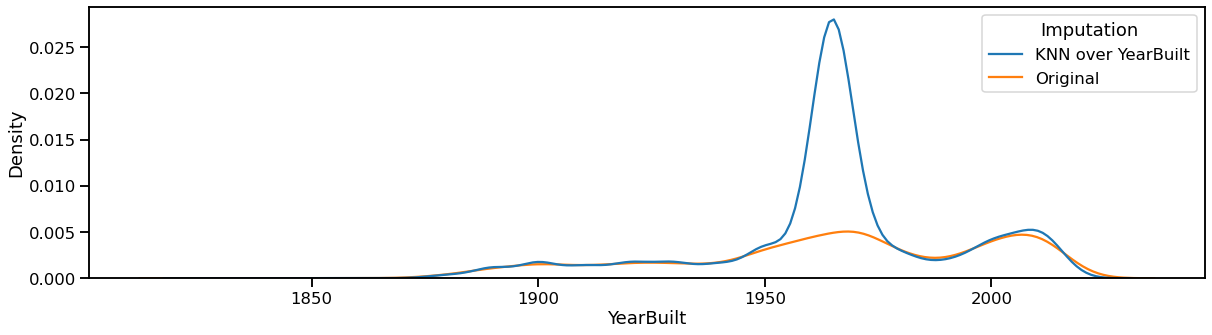

In [40]:
# Construyo el grafico comparando los dos dataframe que se crearon para representar 
# el YearBuilt original y el calculado con INTERACTIVEIMPUTER
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data_year_build, x='YearBuilt', hue='Imputation')

In [41]:
# Creamos un df para registrar los datos para la variable BuildingArea que estan 
# en el data frame 
knn_build_area = melb_df_knn.BuildingArea.to_frame()
knn_build_area['Imputation'] = 'KNN over BuildingArea'

# Creamos un df para registrar los datos que se impoutaron con el metedo 
# KNN para la variable BuildingArea
melb_build_area = melb_df.BuildingArea.dropna().to_frame()
melb_build_area['Imputation'] = 'Original'

data_build_area = pandas.concat([knn_build_area, melb_build_area], ignore_index=True)

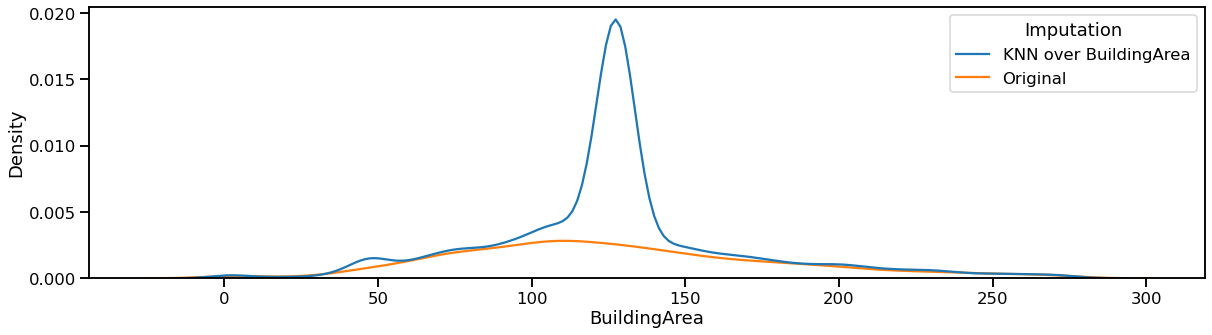

In [42]:
fig = plt.figure(figsize=(20, 5))
g = seaborn.kdeplot(data=data_build_area, x='BuildingArea', hue='Imputation')

## Ejercicio 3 y 4: Reducción de dimensionalidad y guardado de resultados.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Concatene y guarde el dataframe resultante.

In [131]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# to remove scientific notation.
np.set_printoptions(suppress=True)

In [132]:
selected_cols = ['Type_h', 'Type_t', 'Type_u', 'Northern Metropolitan', 
                 'Northern Victoria', 'South-Eastern Metropolitan', 
                 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']

df_to_reduce = melb_df_knn[selected_cols].copy()
df_to_reduce = df_to_reduce.reset_index(drop=True) #re-escalling index

In [133]:
df_to_reduce.head()

,Type_h,Type_t,Type_u,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0


In [134]:
# Calculando, guardando y analizando el explained_variance_ratio_ para n componentes
ratios = {}

for n in range(1, 10):
    pca = PCA(n_components=n)
    pca.fit(df_to_reduce)
    
    explained_ratio = pca.explained_variance_ratio_
    total_ratio = round(explained_ratio.sum(), 2)
    ratios[n] = total_ratio
    
    print(f'{n} components explained variance ratio:')
    print(explained_ratio)
    print(f'Total: {total_ratio}\n')

1 components explained variance ratio:
[0.36404237]
Total: 0.36

2 components explained variance ratio:
[0.36404237 0.25702247]
Total: 0.62

3 components explained variance ratio:
[0.36404237 0.25702247 0.20682642]
Total: 0.83

4 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426]
Total: 0.93

5 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426 0.04832299]
Total: 0.98

6 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426 0.04832299 0.01826651]
Total: 1.0

7 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426 0.04832299 0.01826651
 0.00264309]
Total: 1.0

8 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426 0.04832299 0.01826651
 0.00264309 0.00210189]
Total: 1.0

9 components explained variance ratio:
[0.36404237 0.25702247 0.20682642 0.10077426 0.04832299 0.01826651
 0.00264309 0.00210189 0.        ]
Total: 1.0



In [136]:
# Grafico de explicabilidad por numero de componentes
df_exp_ratios = pd.DataFrame(
    data=ratios.items(), 
    columns=['n_components', 'sum_explained_ratio']
)

fig = px.line(df_exp_ratios, x='n_components', y='sum_explained_ratio', 
              title='N explained variance ratio (PCA)', markers=True)
fig.show()

**Consideramos que 4 componentes ya abarcan una explicabilidad aceptable.**

In [137]:
# aplicando transform del conjunto de datos con 4 componentes
pca = PCA(n_components=4)

n4_ratios = pd.DataFrame(
    data=pca.fit_transform(df_to_reduce), 
    columns=['pca_comp1', 'pca_comp2', 'pca_comp3', 'pca_comp4']
)

In [141]:
# concateno los componentes de explicavilidad con el dataframe original
df_pca = pd.concat([df_to_reduce, n4_ratios], axis=1)
df_pca.head()

,Type_h,Type_t,Type_u,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,pca_comp1,pca_comp2,pca_comp3,pca_comp4
0,1,0,0,1,0,0,0,0,0,-0.58965,0.573917,-0.360021,-0.04592
1,1,0,0,1,0,0,0,0,0,-0.58965,0.573917,-0.360021,-0.04592
2,1,0,0,1,0,0,0,0,0,-0.58965,0.573917,-0.360021,-0.04592
3,1,0,0,1,0,0,0,0,0,-0.58965,0.573917,-0.360021,-0.04592
4,1,0,0,1,0,0,0,0,0,-0.58965,0.573917,-0.360021,-0.04592


In [143]:
# saving results
df_pca.to_csv(os.path.join(DATA_PATH, 'onehot_and_pca_data.csv'))

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
